In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nn import NeuralNetwork, Layer, Relu, MSE

In [2]:
np.random.seed(42)

In [3]:
x = np.arange(-100, 100, 5)

f = lambda x: x ** 2 + 3
y = f(x) + np.random.randn(x.shape[0]) * 500

x_normed = (x - x.mean())/x.std()

x_normed = x_normed[:, np.newaxis]
y = y[:, np.newaxis]

In [4]:
rd_idx = np.random.permutation(np.arange(len(x_normed)))
x_rd = x_normed[rd_idx]
y_rd = y[rd_idx]

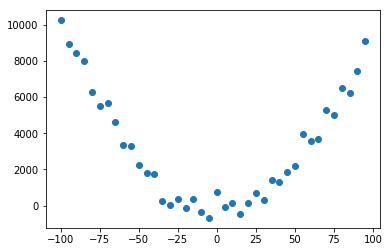

In [5]:
plt.scatter(x, y);

In [20]:
model = NeuralNetwork(n_iterations=10, learning_rate=0.001, verbose=True)
model.add(Layer(1, 20, activation=Relu()))
model.add(Layer(20, 1, activation=None))
# model.add(Layer(20, 2, activation=Sigmoid()))
# model.add(Layer(2, 1, activation=None))

In [21]:
model.fit(x_rd, y_rd)

0: MSE=807445779.6334758


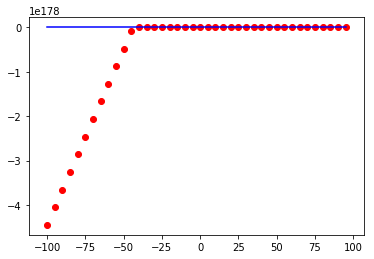

In [22]:
plt.plot(x, y, c='blue')
plt.scatter(x, model.predict(x_normed), c='red')

In [9]:
model.predict(x_rd)

array([[2.52201886e+06],
       [2.23966345e+06],
       [2.14554499e+06],
       [2.33378192e+06],
       [1.67495265e+06],
       [1.11024185e+06],
       [2.42790039e+06],
       [1.81407535e+02],
       [1.81407535e+02],
       [1.58083418e+06],
       [1.81407535e+02],
       [1.69057172e+05],
       [1.81407535e+02],
       [2.05142652e+06],
       [9.22004911e+05],
       [2.61613732e+06],
       [8.27886444e+05],
       [6.39649509e+05],
       [1.86318958e+06],
       [4.51412574e+05],
       [1.81407535e+02],
       [1.81407535e+02],
       [1.81407535e+02],
       [1.48671572e+06],
       [1.20436031e+06],
       [7.33767977e+05],
       [1.81407535e+02],
       [3.57294107e+05],
       [7.49387049e+04],
       [5.45531042e+05],
       [1.81407535e+02],
       [1.95730805e+06],
       [1.29847878e+06],
       [1.81407535e+02],
       [1.39259725e+06],
       [1.81407535e+02],
       [1.76907112e+06],
       [1.81407535e+02],
       [2.63175640e+05],
       [1.01612338e+06]])

In [11]:
model.layers[0].W

array([[ -465.32223432],
       [-1249.38800239]])

In [93]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers, constraints
from keras.optimizers import Adam, SGD

In [94]:
km = Sequential()
# km.add(Dense(10, activation='relu', kernel_constraint=constraints.max_norm(5), kernel_regularizer=regularizers.l2(.5),
#              bias_constraint=constraints.max_norm(), bias_regularizer=regularizers.l2(.5)))
# km.add(Dense(10, activation='relu', kernel_constraint=constraints.max_norm(5), kernel_regularizer=regularizers.l2(.5),
#              bias_constraint=constraints.max_norm(), bias_regularizer=regularizers.l2(.5)))
km.add(Dense(10, activation='relu'))
km.add(Dense(1, activation=None))
km.compile(SGD(lr=.1), loss='mse')

In [95]:
km.fit(x_normed, y, epochs=1000, verbose=0, shuffle=True)

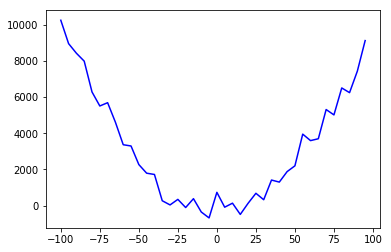

In [96]:
plt.plot(x, y, c='blue')
plt.plot(x, km.predict(x_normed), c='red');